In [1]:
import matplotlib.patches as ptc
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

import os
from pathlib import Path

dataDir = str(Path(os.getcwd()).parent) + '/Data/'

import scipy.stats as sts
import scipy as sp
import numpy as np

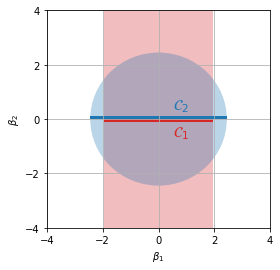

In [3]:
figWidth = 4
figHeight = 4
fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

chi1 = np.sqrt(sts.chi2.ppf(0.95, 1, loc=0, scale=1))
chi2 = np.sqrt(sts.chi2.ppf(0.95, 2, loc=0, scale=1))

r1 = ptc.Rectangle((-chi1, -4), width = 2 * chi1, height = 8)
r2 = ptc.Circle((0, 0), radius = chi2)

b1 = ptc.Rectangle((-chi1, -0.1), width = 2 * chi1, height = 0.1)
b2 = ptc.Rectangle((-chi2, 0), width = 2 * chi2, height = 0.1)

p1 = PatchCollection([r1], facecolor='tab:red', edgecolor='None', alpha=0.3)
p2 = PatchCollection([r2], facecolor='tab:blue', edgecolor='None', alpha=0.3)

q1 = PatchCollection([b1], facecolor='tab:red', edgecolor='None', alpha=1.0)
q2 = PatchCollection([b2], facecolor='tab:blue', edgecolor='None', alpha=1.0)

ax.add_collection(p1)
ax.add_collection(p2)
ax.add_collection(q1)
ax.add_collection(q2)

ax.set_xticks(np.arange(-4, 4.01, 2.0))
ax.set_yticks(np.arange(-4, 4.01, 2.0))

ax.set_xlabel(r"$\beta _1$")
ax.set_ylabel(r'$\beta_2$')

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

ax.text(0.8,-0.5,"$\mathcal{C}_1$", size=15, ha="center", va="center", color='tab:red')
ax.text(0.8, 0.5, "$\mathcal{C}_2$", size=15, ha="center", va="center", color='tab:blue')

ax.grid(True, which='both')
plt.show()

#ax.get_figure().savefig(str(Path(os.getcwd()).parent.parent) + '/ESLExLatex/Figures/E3p2_A.pdf', bbox_inches='tight', pad_inches = 0)

In [7]:
# example:
np.random.seed(0)

beta = np.random.randn(4)
sigma = 0.5
N = 30
p = 3
X_1 = np.random.uniform(low = -1.0, high = 1.0, size = N)

X = np.zeros((N, 4)) + 1
for k in range(1, 4):
    X[:,k] = X[:,k - 1] * X_1
    
Y = np.dot(X, beta) + sigma * np.random.randn(N)

In [8]:
# point-wise band
betahat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
Yhat = np.dot(X, betahat)
Yr = Y - Yhat
sigma2hat = np.sum(Yr * Yr) / (N - p - 1)

x0test = np.arange(start = -1.1, stop = 1.101, step = 0.01)
X0test = np.zeros((x0test.shape[0], 4)) + 1
for k in range(1, 4):
    X0test[:,k] = X0test[:,k - 1] * x0test
    
YhatTest = np.dot(X0test, betahat)
chi_1_95 = sts.chi2.ppf(0.95, 1, loc=0, scale=1)
pointBandSide = np.sqrt(chi_1_95 * sigma2hat * np.diag(np.dot(X0test, np.dot(np.linalg.inv(np.dot(X.T, X)), X0test.T))))

# global band
# letting Q be the square root of X^T.X, the confidence interval for beta is:
# || Q (beta - beta_hat) ||^2 <= sigma_hat^2  chi_{p+1}^2 (1 - \alpha)
# This gives rise to a confidence band of size sigma_hat (chi_{p+1}^2 (1 - \alpha))^{1/2} ||Q^{-1} x_0|| on each side of y_0

Q = sp.linalg.sqrtm(np.dot(X.T, X))
X0test_Qm = np.dot(X0test, np.linalg.inv(Q))

chi_4_95 = sts.chi2.ppf(0.95, 4, loc=0, scale=1)

globalBandSide = np.sqrt(sigma2hat * chi_4_95 * np.sum(X0test_Qm * X0test_Qm, axis = 1))

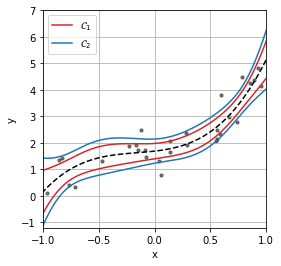

In [6]:
figWidth = 4
figHeight = 4
fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

ax.scatter(X_1, Y, s = 10, color = 'black', alpha = 0.5)
ax.plot(x0test, YhatTest, '--', color = 'black')
ax.plot(x0test, YhatTest + pointBandSide, color = 'tab:red', label=r'$\mathcal{C}_1$')
ax.plot(x0test, YhatTest - pointBandSide, color = 'tab:red')
ax.plot(x0test, YhatTest + globalBandSide, color = 'tab:blue', label=r'$\mathcal{C}_2$')
ax.plot(x0test, YhatTest - globalBandSide, color = 'tab:blue')


ax.set_xlabel(r"x")
ax.set_ylabel(r'y')

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 7])

ax.grid(True, which='both')
ax.legend()
#ax.get_figure().savefig(str(Path(os.getcwd()).parent.parent) + '/ESLExLatex/Figures/E3p2_B.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()